In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import pi
%matplotlib inline

# Percobaan 1

Persamaan:
y = 0.0016333333333333332 x + 0.13500000000000006
Kesalahan: 
delta m = 0.00011974399500026845


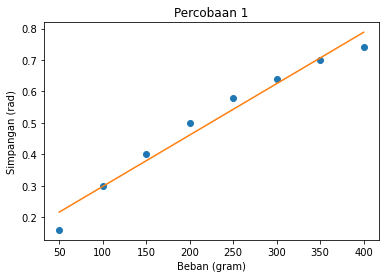

In [4]:
df_p1 = pd.read_csv("Percobaan 1.txt", sep = "\t", index_col = "No")
x_p1 = df_p1["Beban (gram)"]
y_p1 = df_p1["Simpangan (rad)"]
x_const_p1 = sm.add_constant(x_p1)
hasil_p1 = sm.OLS(y_p1, x_const_p1).fit()

const_p1 = hasil_p1.params[0]
grad_p1 = hasil_p1.params[1]
print(f"Persamaan:\ny = {grad_p1} x + {const_p1}")

grad_err_p1 = hasil_p1.bse[1]
print("Kesalahan: \ndelta m =", grad_err_p1)

y_predict_p1 = grad_p1*x_p1 + const_p1
plt.plot(x_p1, y_p1,'o', x_p1, y_predict_p1)
plt.title("Percobaan 1")
plt.xlabel("Beban (gram)")
plt.ylabel("Simpangan (rad)")
plt.show()

In [5]:
print(hasil_p1.summary())

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:        Simpangan (rad)   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     186.1
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           9.64e-06
Time:                        23:09:04   Log-Likelihood:                 15.794
No. Observations:                   8   AIC:                            -27.59
Df Residuals:                       6   BIC:                            -27.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1350      0.030      4.465   

## Kalkulasi koefisien puntir

In [6]:
r = 2.5
g = 98
koef_puntir = -(2*g*r)/grad_p1
err_koef_puntir = -(2*g*r*grad_err_p1)/(grad_p1**2)
print("Koefisien puntir =", koef_puntir, "dengan kesalahan", err_koef_puntir)
rel_err_koef_puntir = abs(err_koef_puntir/koef_puntir)*100
print("Kesalahan relatif =", rel_err_koef_puntir, "%")

Koefisien puntir = -300000.0 dengan kesalahan -21993.79500004931
Kesalahan relatif = 7.331265000016438 %


# Percobaan 2

    teta (rad)  t (s)       T^2
No                             
1          0.1   5.68  3.584711
2          0.2   5.71  3.622678
3          0.4   5.77  3.699211
4          0.6   5.75  3.673611
5          0.8   5.79  3.724900
6          1.0   5.84  3.789511
7          1.1   5.80  3.737778
Persamaan:
y = 0.1648938271604925 x + 3.591406560846562


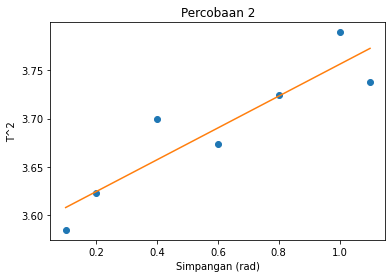

In [7]:
df_p2 = pd.read_csv("Percobaan 2.txt", sep = "\t", index_col = "No")
x_p2 = df_p2["teta (rad)"]
t_p2 = df_p2["t (s)"]

n = 3
df_p2["T^2"] = (t_p2/n)**2
y_p2 = df_p2["T^2"]
print(df_p2)
x_const_p2 = sm.add_constant(x_p2)
hasil_p2 = sm.OLS(y_p2, x_const_p2).fit()

const_p2 = hasil_p2.params[0]
grad_p2 = hasil_p2.params[1]
print(f"Persamaan:\ny = {grad_p2} x + {const_p2}")

y_predict_p2 = grad_p2*x_p2 + const_p2
plt.plot(x_p2, y_p2,'o', x_p2, y_predict_p2)
plt.title("Percobaan 2")
plt.xlabel("Simpangan (rad)")
plt.ylabel("T^2")
plt.show()

In [8]:
print(hasil_p2.summary())

                            OLS Regression Results                            
Dep. Variable:                    T^2   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     24.96
Date:                Wed, 14 Apr 2021   Prob (F-statistic):            0.00412
Time:                        23:09:05   Log-Likelihood:                 15.491
No. Observations:                   7   AIC:                            -26.98
Df Residuals:                       5   BIC:                            -27.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5914      0.023    155.662      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


## Mencari inersia sistem

In [9]:
inert_sys2 = -(const_p2*koef_puntir)/(4*(pi**2))
print("Inersia sistem percobaan 2:", inert_sys2)

Inersia sistem percobaan 2: 27291.417276437347


# Percobaan 3

    Jumlah quadrant  t (s)       T^2
No                                  
1                 1   6.05  4.066944
2                 2   6.36  4.494400
3                 3   6.73  5.032544
4                 4   7.19  5.744011
5                 5   7.33  5.969878
6                 6   7.81  6.777344
7                 7   8.10  7.290000
8                 8   8.20  7.471111
Persamaan:
 y = 0.5150884920634916 x + 3.537880952380954


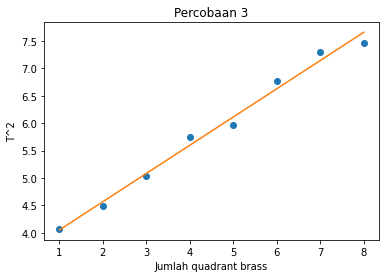

In [10]:
df_p3 = pd.read_csv("Percobaan 3.txt", sep = "\t", index_col = "No")
x_p3 = df_p3["Jumlah quadrant"]
t_p3 = df_p3["t (s)"]

n = 3
df_p3["T^2"] = (t_p3/n)**2
y_p3 = df_p3["T^2"]
print(df_p3)
x_const_p3 = sm.add_constant(x_p3)
hasil_p3 = sm.OLS(y_p3, x_const_p3).fit()

const_p3 = hasil_p3.params[0]
grad_p3 = hasil_p3.params[1]
print(f"Persamaan:\n y = {grad_p3} x + {const_p3}")

y_predict_p3 = hasil_p3.params[1]*x_p3 + hasil_p3.params[0]
plt.plot(x_p3, y_p3,'o', x_p3, y_predict_p3)
plt.title("Percobaan 3")
plt.xlabel("Jumlah quadrant brass")
plt.ylabel("T^2")
plt.show()

In [11]:
print(hasil_p3.summary())

                            OLS Regression Results                            
Dep. Variable:                    T^2   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     519.1
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           4.68e-07
Time:                        23:09:06   Log-Likelihood:                 5.1642
No. Observations:                   8   AIC:                            -6.328
Df Residuals:                       6   BIC:                            -6.170
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.5379      0.114     

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Mencari inersia benda dan inersia sistem

In [12]:
inert_brass = -(grad_p3*koef_puntir)/(4*(pi**2))
print("Inersia benda:", inert_brass)

inert_sys3 = -(const_p3*koef_puntir)/(4*(pi**2))
print("Inersia sistem percobaan 3:", inert_sys3)

Inersia benda: 3914.203177231491
Inersia sistem percobaan 3: 26884.671426068962


# Perbandingan inersia sistem percobaan 2 dengan percobaan 3

In [13]:
print("Inersia sistem percobaan 2:", inert_sys2, 
      "\nInersia sistem percobaan 3:", inert_sys3)
diff_inert = abs(inert_sys2-inert_sys3)
perc_diff_inert = abs((inert_sys2-inert_sys3)/inert_sys3)*100
print("Perbedaan inersia sistem:", diff_inert, 
      f"dengan persentase {perc_diff_inert} %")

Inersia sistem percobaan 2: 27291.417276437347 
Inersia sistem percobaan 3: 26884.671426068962
Perbedaan inersia sistem: 406.7458503683847 dengan persentase 1.5129284785455104 %
